In [1]:
%matplotlib inline

# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time  # to convert time obtain from API request
import datetime # to get the current date --> logfile / figures
import openweathermapy as owm # API wrapper to ease the request
import logging # logging library to print in the console and a file at the same time
import json 
import os

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [3]:
# Create logfile and Logging configuration
# this will allow us to write in a text-file and in the terminal at the same time

# Getting current date
now = datetime.datetime.now()
# Creating logfile name using the date
logfile = "weather_analysis_%s.log"%(now.strftime("%Y_%m_%d"))
open(logfile, 'w').close()  #to delete the existing content of the file
level = logging.INFO
format = '%(message)s'
handlers = [logging.FileHandler(logfile), logging.StreamHandler()]
logging.basicConfig(level = level, format = format, handlers = handlers)

## Generate Cities List

In [4]:
logging.info('Creating Cities List')
logging.info('--------------------')

# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
logging.info(f'{len(cities)} cities listed\n')

Creating Cities List
--------------------
630 cities listed



### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
logging.info('Beginning API calls')
logging.info('-------------------')

# Setting °C and api key
settings = {"units" : "metric", "appid" : api_key}

weather_data = [] # Initializing the weather_data list
ii = 0 # Index to follow the call process
for city in cities:
    ii += 1 # Incrementing the index
    try:
        # API call to grab data for the current city
        weather_data.append(owm.get_current(city, **settings))
        # Message in logfile to follow the calls process
        logging.info(f"Processing city {ii}/{len(cities)} | {city} - OK")
    except Exception as e:
        # If the city is not found
        logging.info(f"{city} - Not Found - {e}")
    # 1sec pause to avoid error (HTTP Error 429) due to too many calls in too little time
    time.sleep(1)
    
logging.info('---------------------')   
logging.info('End of API calls\n')
    

Beginning API calls
-------------------
Processing city 1/627 | nancha - OK
Processing city 2/627 | palomares - OK
Processing city 3/627 | rikitea - OK
Processing city 4/627 | victoria - OK
Processing city 5/627 | hermanus - OK
Processing city 6/627 | suruc - OK
Processing city 7/627 | iralaya - OK
Processing city 8/627 | sao joao da barra - OK
Processing city 9/627 | mataura - OK
Processing city 10/627 | tuktoyaktuk - OK
Processing city 11/627 | pitimbu - OK
Processing city 12/627 | talnakh - OK
Processing city 13/627 | puerto ayora - OK
Processing city 14/627 | champerico - OK
Processing city 15/627 | ushuaia - OK
wahran - Not Found - HTTP Error 404: Not Found
Processing city 17/627 | tasiilaq - OK
Processing city 18/627 | vila velha - OK
Processing city 19/627 | kodinsk - OK
Processing city 20/627 | ambovombe - OK
taolanaro - Not Found - HTTP Error 404: Not Found
Processing city 22/627 | esperance - OK
Processing city 23/627 | kapaa - OK
Processing city 24/627 | inirida - OK
Process

Processing city 199/627 | bealanana - OK
Processing city 200/627 | astana - OK
Processing city 201/627 | kloulklubed - OK
Processing city 202/627 | santa cruz - OK
Processing city 203/627 | bonnyville - OK
Processing city 204/627 | meulaboh - OK
Processing city 205/627 | kavaratti - OK
samusu - Not Found - HTTP Error 404: Not Found
Processing city 207/627 | cabo san lucas - OK
Processing city 208/627 | batagay-alyta - OK
Processing city 209/627 | tigil - OK
Processing city 210/627 | palmer - OK
Processing city 211/627 | victor harbor - OK
Processing city 212/627 | tabou - OK
Processing city 213/627 | bilibino - OK
Processing city 214/627 | vao - OK
Processing city 215/627 | bocaiuva - OK
Processing city 216/627 | palauig - OK
Processing city 217/627 | avera - OK
Processing city 218/627 | mitsamiouli - OK
Processing city 219/627 | bilma - OK
Processing city 220/627 | kruisfontein - OK
Processing city 221/627 | hithadhoo - OK
Processing city 222/627 | labytnangi - OK
Processing city 223/

Processing city 398/627 | kurya - OK
Processing city 399/627 | manica - OK
Processing city 400/627 | lagos - OK
Processing city 401/627 | yulara - OK
hihifo - Not Found - HTTP Error 404: Not Found
Processing city 403/627 | narsaq - OK
Processing city 404/627 | touros - OK
Processing city 405/627 | srandakan - OK
Processing city 406/627 | karpogory - OK
Processing city 407/627 | muros - OK
Processing city 408/627 | los llanos de aridane - OK
ksenyevka - Not Found - HTTP Error 404: Not Found
amderma - Not Found - HTTP Error 404: Not Found
Processing city 411/627 | faya - OK
Processing city 412/627 | lavos - OK
tancanhuitz - Not Found - HTTP Error 404: Not Found
Processing city 414/627 | vagur - OK
Processing city 415/627 | mul - OK
Processing city 416/627 | grand gaube - OK
Processing city 417/627 | aasiaat - OK
Processing city 418/627 | barahona - OK
Processing city 419/627 | mezen - OK
Processing city 420/627 | hualmay - OK
Processing city 421/627 | karratha - OK
Processing city 422/62

Processing city 597/627 | balkhash - OK
Processing city 598/627 | cap malheureux - OK
Processing city 599/627 | nago - OK
Processing city 600/627 | bria - OK
Processing city 601/627 | kasuga - OK
mahadday weyne - Not Found - HTTP Error 404: Not Found
Processing city 603/627 | samarinda - OK
Processing city 604/627 | san cristobal - OK
Processing city 605/627 | sembakung - OK
Processing city 606/627 | tuyen quang - OK
Processing city 607/627 | marshall - OK
Processing city 608/627 | suez - OK
Processing city 609/627 | ilebo - OK
Processing city 610/627 | arman - OK
halalo - Not Found - HTTP Error 404: Not Found
Processing city 612/627 | bunia - OK
burkhala - Not Found - HTTP Error 404: Not Found
Processing city 614/627 | pampas - OK
Processing city 615/627 | noumea - OK
Processing city 616/627 | tchibanga - OK
Processing city 617/627 | xuddur - OK
Processing city 618/627 | yeppoon - OK
Processing city 619/627 | makaryev - OK
Processing city 620/627 | sydney - OK
Processing city 621/627 

In [5]:
# Success rate and number of cities for which data is collecter
nb_cities_with_data = len(weather_data)
success_rate = nb_cities_with_data/len(cities)*100
logging.info("Data found on %i cities out of %i (%.1f%%) "%(nb_cities_with_data, len(cities),success_rate))
        
# Processing the response to extract the infos we want to process
summary = ['name','sys.country', # Name of the city and Country
           'coord.lon', 'coord.lat', # Coordinates
           'dt',  # Time
           'main.temp', 'main.temp_max',# Temperatures
           'main.humidity',          # Humidity
           'clouds.all',  # Clouds
          'wind.speed']   # Wind
data = [response(*summary) for response in weather_data]        

NameError: name 'weather_data' is not defined

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
# List of columns headers
clabels = [ "City","Country",
          "Lng", "Lat",
           "Date",           
          "Avg Temp","Max Temp",
          "Humidity",
          "Clouds",
          "Wind speed"]

# Creating dataframe with headers
df = pd.DataFrame(data, columns=clabels)

# Saving into csv file
df.to_csv(output_data_file, index=False)

logging.info(f'Data saved in: {output_data_file}')
df.head()

Data saved in: output_data/cities.csv


,City,Country,Lng,Lat,Date,Avg Temp,Max Temp,Humidity,Clouds,Wind speed
0,Nancha,CN,129.26,47.14,1538032248,17.78,17.78,50,0,1.32
1,Palomares,ES,-5.74,40.39,1538031600,12.00,12.00,93,20,1.50
2,Rikitea,PF,-134.97,-23.12,1538032250,21.88,21.88,100,44,10.02
3,Victoria,BN,115.24,5.28,1538029800,31.01,32.00,79,75,1.50
4,Hermanus,ZA,19.24,-34.42,1538032253,14.08,14.08,81,36,3.72


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [17]:
# To avoid repeating the APIcalls each time, we also take to option to load the dataframe from the csvfile
df = pd.read_csv(output_data_file)
df.head()
nb_cities_with_data = df['City'].count()

#### Longitude vs. Latitude Plot
To visualize how the cities are distributed.

Created figure: output_data\fig1_cities_positions.png


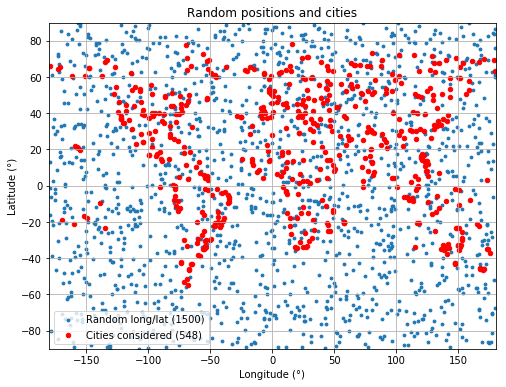

In [18]:
# Plot the random lat/long and the position of the related cities to see how they are distributed
# path to save figure
fig1_name = os.path.join("output_data",'fig1_cities_positions.png')

plt.figure(figsize=(8, 6),facecolor="w")

# plt.hold(True)
plt.scatter(lngs, lats, s=8, label=f"Random long/lat ({len(lngs)})") # plot the random lat and long values
plt.scatter(df.Lng, df.Lat, s=20, color="r", label=f"Cities considered ({nb_cities_with_data})")
# plt.scatter()
#TODO : plot the resulting lat and long values
# Making the figure prettier
plt.title('Random positions and cities')
plt.xlabel('Longitude (°)')   
plt.ylabel('Latitude (°)')
plt.xlim(-180, 180)
plt.ylim(-90,90)
plt.grid()
plt.legend()

# Save the figure and display the name in the log
plt.savefig(fig1_name)
logging.info(f"Created figure: {fig1_name}")

# Display the figure
plt.show()

There is considerably more land in the North hemisphere than the South --> we will have more data on the north hemisphere

In [19]:
south_cities = df.Lat.loc[df.Lat<=0].count()
north_cities = df.Lat.loc[df.Lat>0].count()
logging.info("%i cities in the North hemisphere (%.2f%%)"%(north_cities, north_cities/nb_cities_with_data*100))
logging.info("%i cities in the South hemisphere (%.2f%%)" %(south_cities,south_cities/nb_cities_with_data*100))

389 cities in the North hemisphere (70.99%)
159 cities in the South hemisphere (29.01%)


#### Latitude vs. Temperature Plot

In [20]:
# Building the string dating the data
str_date = time.strftime("%m-%d-%Y", time.gmtime(df['Date'][0]))

Created figure: output_data\fig2_Lat_vs_MaxTemp.png


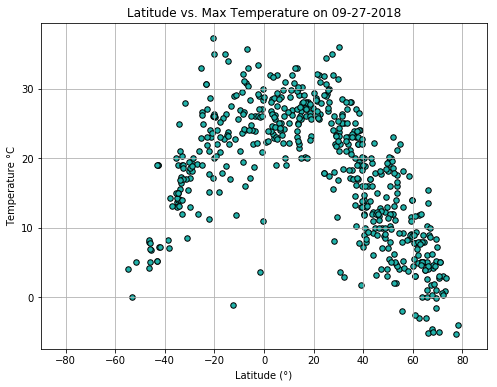

In [21]:
# File name for the figure
fig2_name = os.path.join("output_data",'fig2_Lat_vs_MaxTemp.png')

# Creating the figure
plt.figure(figsize=(8, 6),facecolor="w")
# Scatter plot
plt.scatter(df.Lat, df['Max Temp'], s=30, c="lightseagreen", edgecolors='k'      )
# Making the figure prettier
plt.title(f'Latitude vs. Max Temperature on %s'%(str_date))
plt.ylabel('Temperature °C')   
plt.xlabel('Latitude (°)')
plt.xlim(-90,90)
plt.grid()

# Save the figure and display the name in the log
plt.savefig(fig2_name)
logging.info(f"Created figure: {fig2_name}")

# Display the figure
plt.show()

#### Coordinates vs. Temperature
We try to use scatter plots to describe the Temperature parameter according to both coordinates parameters

Created figure: output_data\fig3_coord_MaxTemp.png


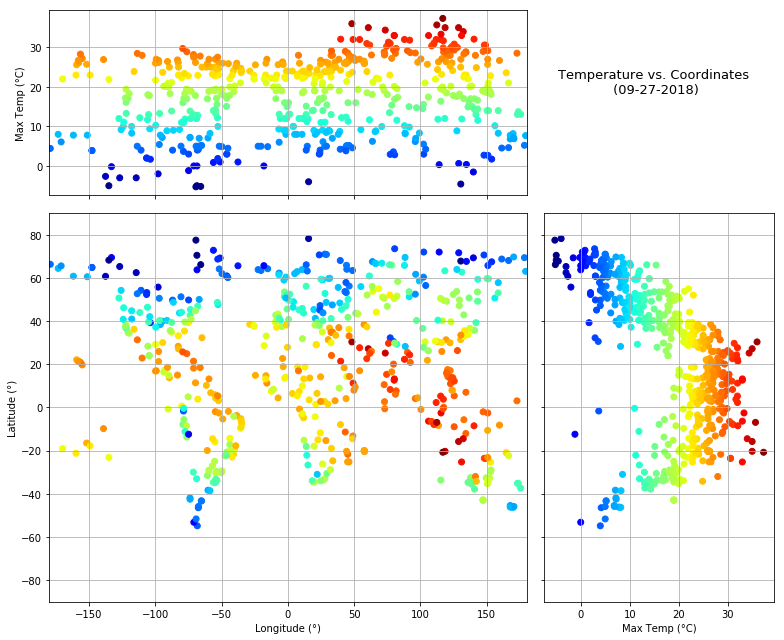

In [22]:
# File name for the figure
fig3_name = os.path.join("output_data",'fig3_coord_MaxTemp.png')

# Creating the figure
fig = plt.figure(figsize=(11, 9),facecolor="w")
plt.jet() #Setting the colormap

# We will make 3 plots on the figure:

# ax1/ A scatter plot of the cities coord coloring the dots with the temperature
#-------------------------------------------------------------------------------
ax1 = plt.subplot2grid((3, 3), (1, 0), colspan=2, rowspan=2)
ax1.scatter(df.Lng, df.Lat, c=df['Max Temp'])
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.xlabel('Longitude (°)')
plt.ylabel('Latitude (°)')
plt.grid()

# ax2/ A scatter plot of x=Temp, y=Lat
#-------------------------------------
ax2 = plt.subplot2grid((3, 3), (1, 2), rowspan=2)
ax2.scatter(df['Max Temp'], df.Lat, c=df['Max Temp'])
plt.ylim(-90,90)
ax2.yaxis.set_ticklabels([])
plt.xlabel('Max Temp (°C)')
plt.grid()

# ax3/ A scatter plot of x=Long, y=Temp
#--------------------------------------
ax3 = plt.subplot2grid((3, 3), (0, 0), colspan=2)
ax3.scatter(df.Lng, df['Max Temp'], c=df['Max Temp'])
plt.xlim(-180,180)
ax3.xaxis.set_ticklabels([])
plt.ylabel('Max Temp (°C)')
plt.grid()

# Adding the title on the top right spare space
plt.gcf().text(0.83, 0.85, f"Temperature vs. Coordinates\n ({str_date})", 
               fontsize=13, horizontalalignment="center")

plt.tight_layout()

#Save the figure and display the name in the log
plt.savefig(fig3_name)
logging.info(f"Created figure: {fig3_name}")

# Display the figure
plt.show()

* Correlating the global position to the previous plot (Latitude vs. Temp) help us explain the few outlier cities that are within the -30/30 latitude range but still have low temperature.
They seem to be located on high altitude regions (Andes or Himalaya).
* By observing the Temperature / Longitude plot, we notice, as expected, that there is no strong correlation between the West-East location and the temperature. However, we can notice that more "hot" cities are located on the Eastern part of the world. It may only be related to the repartition of land and population with a lot of cities in South-East Asia.

#### Latitude vs. Humidity Plot

Created figure: output_data\fig4_coord_Humidity.png


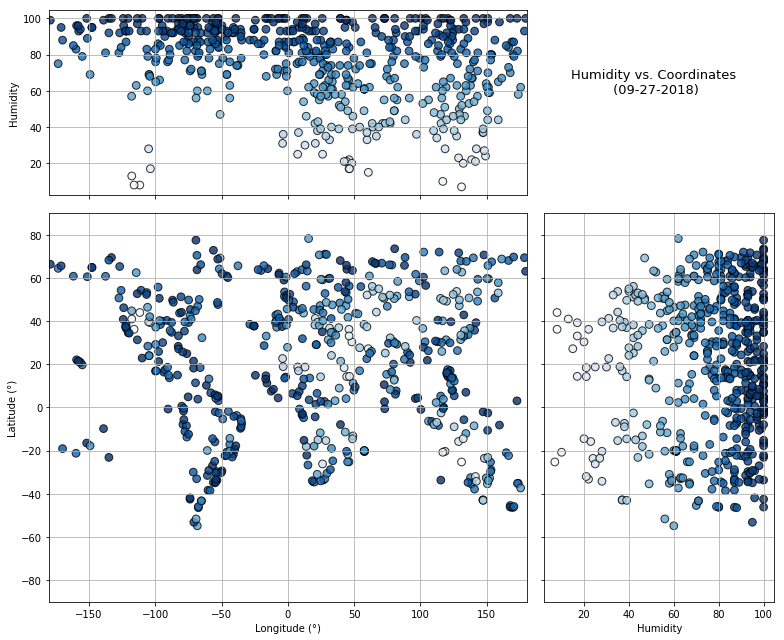

In [41]:
# File name for the figure
fig4_name = os.path.join("output_data",'fig4_coord_Humidity.png')

# Creating the figure
fig = plt.figure(figsize=(11, 9),facecolor="w")
plt.set_cmap('Blues') # Set the colormap

# We will make 3 plots on the figure:

# ax1/ A scatter plot of the cities coord coloring the dots with the temperature
#-------------------------------------------------------------------------------
ax1 = plt.subplot2grid((3, 3), (1, 0), colspan=2, rowspan=2)
ax1.scatter(df.Lng, df.Lat, c=df['Humidity'], edgecolors="k", s=60, alpha=0.8)
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.xlabel('Longitude (°)')
plt.ylabel('Latitude (°)')
plt.grid()

# ax2/ A scatter plot of x=Temp, y=Lat
#-------------------------------------
ax2 = plt.subplot2grid((3, 3), (1, 2), rowspan=2)
ax2.scatter(df['Humidity'], df.Lat, c=df['Humidity'], edgecolors="k", s=60, alpha=0.8)
plt.ylim(-90,90)
ax2.yaxis.set_ticklabels([])
plt.xlabel('Humidity')
plt.grid()

# ax3/ A scatter plot of x=Long, y=Temp
#--------------------------------------
ax3 = plt.subplot2grid((3, 3), (0, 0), colspan=2)
ax3.scatter(df.Lng, df['Humidity'], c=df['Humidity'], edgecolors="k", s=60, alpha=0.8)
plt.xlim(-180,180)
ax3.xaxis.set_ticklabels([])
plt.ylabel('Humidity')
plt.grid()

# Adding the title on the top right spare space
plt.gcf().text(0.83, 0.85, f"Humidity vs. Coordinates\n ({str_date})", 
               fontsize=13, horizontalalignment="center")

plt.tight_layout()

#Save the figure and display the name in the log
plt.savefig(fig4_name)
logging.info(f"Created figure: {fig4_name}")

# Display the figure
plt.show()

* There is no strong correlation between Latitude and Humidity.
* Even if extremely desertic or humid area are not the most populated, the colormap plot with both coordinate allows to regognize some desertic places.
* We can also notice that the drier places are not located on the equator, but are more encountered on -30 and +30° of latitudes.

#### Latitude vs. Cloudiness Plot

Created figure: output_data\fig5_coord_Clouds.png


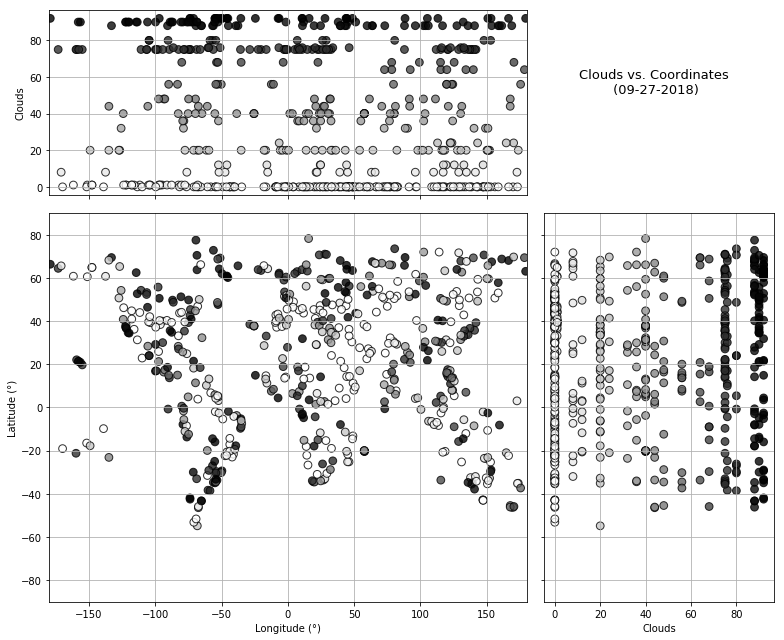

In [45]:
# File name for the figure
fig5_name = os.path.join("output_data",'fig5_coord_Clouds.png')

# Creating the figure
fig = plt.figure(figsize=(11, 9),facecolor="w")
plt.set_cmap('gist_yarg') # Set the colormap

# We will make 3 plots on the figure:

# ax1/ A scatter plot of the cities coord coloring the dots with the temperature
#-------------------------------------------------------------------------------
ax1 = plt.subplot2grid((3, 3), (1, 0), colspan=2, rowspan=2)
ax1.scatter(df.Lng, df.Lat, c=df['Clouds'], edgecolors="k", s=60, alpha=0.8)
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.xlabel('Longitude (°)')
plt.ylabel('Latitude (°)')
plt.grid()

# ax2/ A scatter plot of x=Temp, y=Lat
#-------------------------------------
ax2 = plt.subplot2grid((3, 3), (1, 2), rowspan=2)
ax2.scatter(df['Clouds'], df.Lat, c=df['Clouds'], edgecolors="k", s=60, alpha=0.8)
plt.ylim(-90,90)
ax2.yaxis.set_ticklabels([])
plt.xlabel('Clouds')
plt.grid()

# ax3/ A scatter plot of x=Long, y=Temp
#--------------------------------------
ax3 = plt.subplot2grid((3, 3), (0, 0), colspan=2)
ax3.scatter(df.Lng, df['Clouds'], c=df['Clouds'], edgecolors="k", s=60, alpha=0.8)
plt.xlim(-180,180)
ax3.xaxis.set_ticklabels([])
plt.ylabel('Clouds')
plt.grid()

# Adding the title on the top right spare space
plt.gcf().text(0.83, 0.85, f"Clouds vs. Coordinates\n ({str_date})", 
               fontsize=13, horizontalalignment="center")

plt.tight_layout()

#Save the figure and display the name in the log
plt.savefig(fig5_name)
logging.info(f"Created figure: {fig5_name}")

# Display the figure
plt.show()

* No strong correlation between latitude and clouds
* We can notice that the quantification of clouds have "steps".

#### Latitude vs. Wind Speed Plot

Created figure: output_data\fig6_coord_Clouds.png


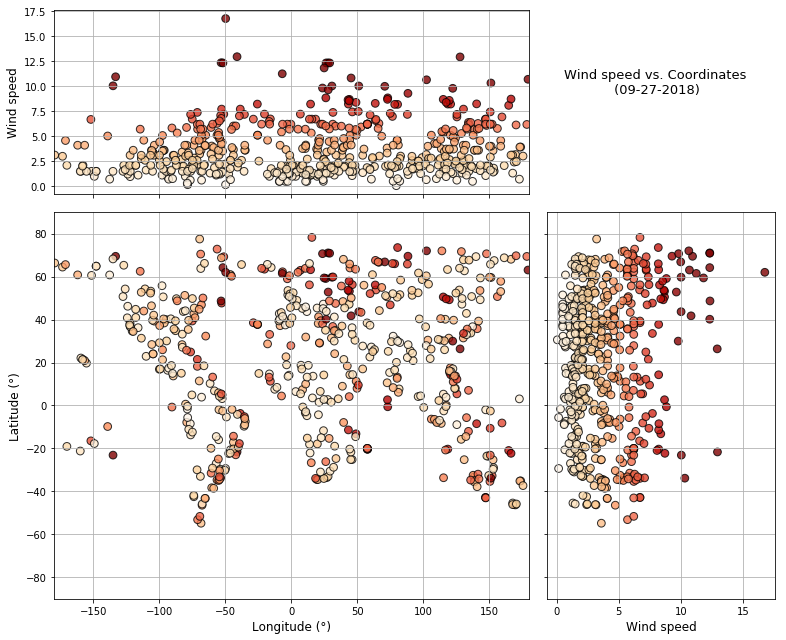

In [56]:
# File name for the figure
fig6_name = os.path.join("output_data",'fig6_coord_Clouds.png')

# Creating the figure
fig = plt.figure(figsize=(11, 9),facecolor="w")
plt.set_cmap('OrRd') # Set the colormap
# I couldn't find an elegant way to set the color limits (--> always apply only to imshow)
# so let's do it the dirty way:
wind_speed_col = [ 10 if ws >=10 else ws for ws in df['Wind speed']]

# [3 if i >=3 else i for i in x]/

# We will make 3 plots on the figure:

# ax1/ A scatter plot of the cities coord coloring the dots with the temperature
#-------------------------------------------------------------------------------
ax1 = plt.subplot2grid((3, 3), (1, 0), colspan=2, rowspan=2)
ax1.scatter(df.Lng, df.Lat, c=wind_speed_col, edgecolors="k", s=60, alpha=0.8)
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.xlabel('Longitude (°)', fontsize=12)
plt.ylabel('Latitude (°)', fontsize=12)
plt.grid()
# plt.clim(-4,4)

# ax2/ A scatter plot of x=Temp, y=Lat
#-------------------------------------
ax2 = plt.subplot2grid((3, 3), (1, 2), rowspan=2)
ax2.scatter(df['Wind speed'], df.Lat, c=wind_speed_col, edgecolors="k", s=60, alpha=0.8)
plt.ylim(-90,90)
ax2.yaxis.set_ticklabels([])
plt.xlabel('Wind speed', fontsize=12)
plt.grid()

# ax3/ A scatter plot of x=Long, y=Temp
#--------------------------------------
ax3 = plt.subplot2grid((3, 3), (0, 0), colspan=2)
ax3.scatter(df.Lng, df['Wind speed'], c=wind_speed_col, edgecolors="k", s=60, alpha=0.8)
plt.xlim(-180,180)
ax3.xaxis.set_ticklabels([])
plt.ylabel('Wind speed', fontsize=12)
plt.grid()

# Adding the title on the top right spare space
plt.gcf().text(0.83, 0.85, f"Wind speed vs. Coordinates\n ({str_date})", 
               fontsize=13, horizontalalignment="center")

plt.tight_layout()

#Save the figure and display the name in the log
plt.savefig(fig6_name)
logging.info(f"Created figure: {fig6_name}")

# Display the figure
plt.show()